# Average and deviation std of the models for the loss

In [2]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Extract targets and preditions from the folder
def extract_targets_preditions(directory):
    target_tuples = []
    predit_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):                       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            predit_tuples.extend([(label, array) for label, array in result_sim if 'prediction' in label])
    return target_tuples, predit_tuples

In [4]:
# Compute loss
def CMatrixMSELoss(target_matrix, predicted_matrix):
    mag_diff_sq = np.abs(predicted_matrix - target_matrix)**2
    loss = np.sum(mag_diff_sq) / np.size(target_matrix)
    return loss

In [5]:
def remove_until_underscore(s):     # from the end until the first '_'
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

def derive_loss(target_tuples, predit_tuples):
    # N = len(predit_tuples[0][1])
    loss = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(predit_tuples[i][0]):
            loss.extend([CMatrixMSELoss(target_tuples[i][1], predit_tuples[i][1])])
        else:
            print("Capo abbiamo un problema :(")

    labels = [t[0] for t in predit_tuples]
    loss_pd = pd.DataFrame({'label': labels, 'value': loss})
    return loss_pd

In [6]:
# MIN value repetition
def models_repmin_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].min()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = min_lastLoss_s[min_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

In [7]:
# MAX value repetition
def models_repmax_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    max_lastLoss_s = df.groupby('label_no_rep')['value'].max()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = max_lastLoss_s[max_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

# 23 05 2024 - Outdata MISS SIM

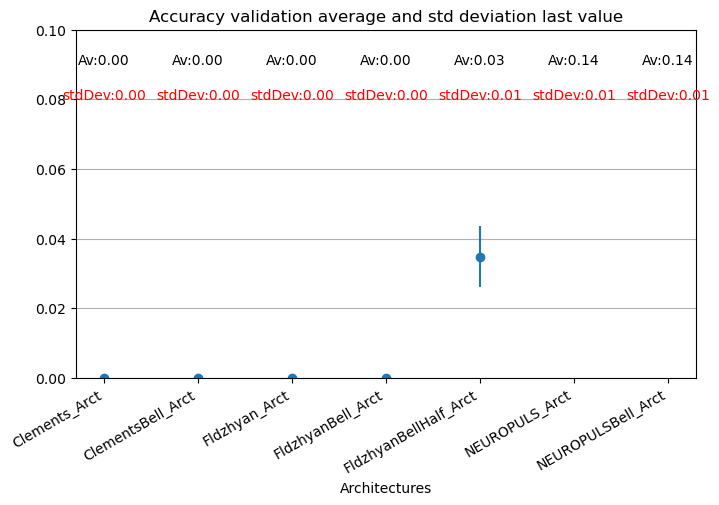

,label,average_value,std_dev_value
0,Clements_Arct,2.662229e-09,1.652012e-08
1,ClementsBell_Arct,2.674160e-08,3.061858e-07
2,Fldzhyan_Arct,3.885397e-06,1.184736e-05
3,FldzhyanBell_Arct,2.918839e-06,1.016331e-05
4,FldzhyanBellHalf_Arct,3.476454e-02,8.739658e-03
5,NEUROPULS_Arct,1.382123e-01,1.420079e-02
6,NEUROPULSBell_Arct,1.382603e-01,1.423983e-02


In [10]:
directory = 'outdata/20240523_run/n8_iloss0.0_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

# 22 05 2024 - Outputdata ERROR

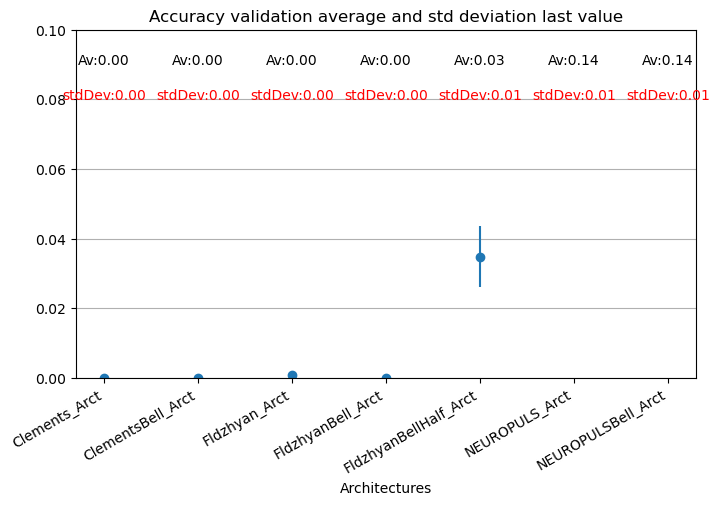

In [12]:
directory = 'outdata/20240522_run/n8_iloss0.0_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [13]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,Clements_Arct,2.662229e-09,1.652012e-08
1,ClementsBell_Arct,2.674160e-08,3.061858e-07
2,Fldzhyan_Arct,7.091242e-04,4.942295e-04
3,FldzhyanBell_Arct,2.918839e-06,1.016331e-05
4,FldzhyanBellHalf_Arct,3.476454e-02,8.739658e-03
5,NEUROPULS_Arct,1.382123e-01,1.420079e-02
6,NEUROPULSBell_Arct,1.382603e-01,1.423983e-02


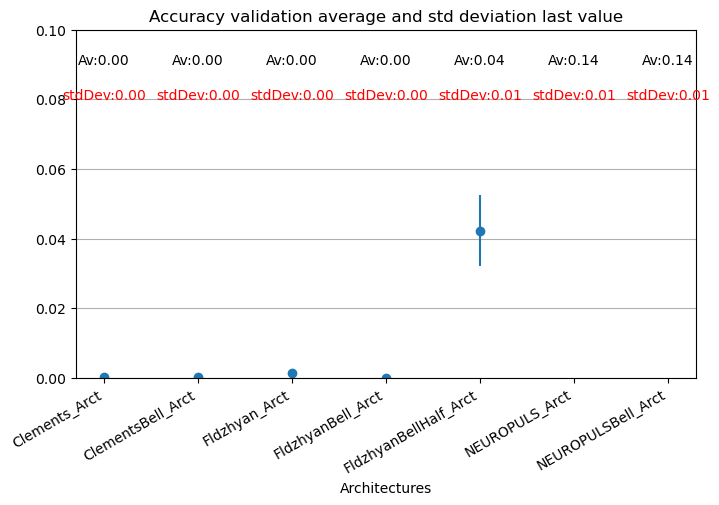

In [17]:
directory = 'outdata/20240522_run/n8_iloss0.0_imb0.1_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [18]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,Clements_Arct,0.000206,0.000239
1,ClementsBell_Arct,0.000203,0.000241
2,Fldzhyan_Arct,0.001481,0.001038
3,FldzhyanBell_Arct,0.000032,0.000067
4,FldzhyanBellHalf_Arct,0.042284,0.010237
5,NEUROPULS_Arct,0.138212,0.014201
6,NEUROPULSBell_Arct,0.138260,0.014240


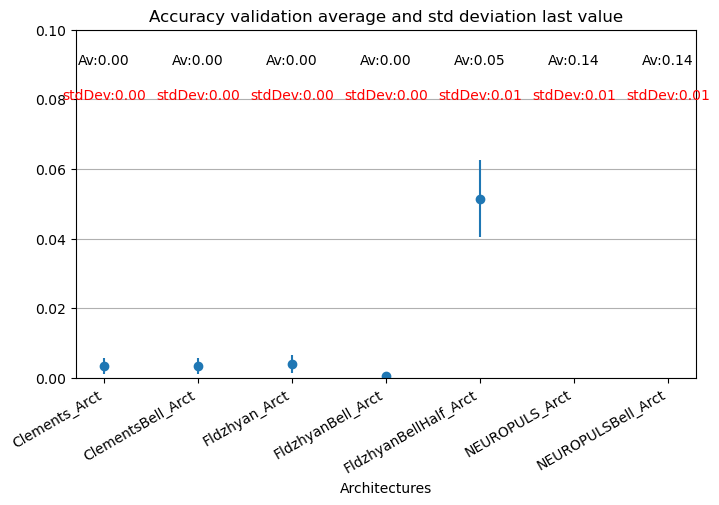

In [19]:
directory = 'outdata/20240522_run/n8_iloss0.0_imb0.2_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

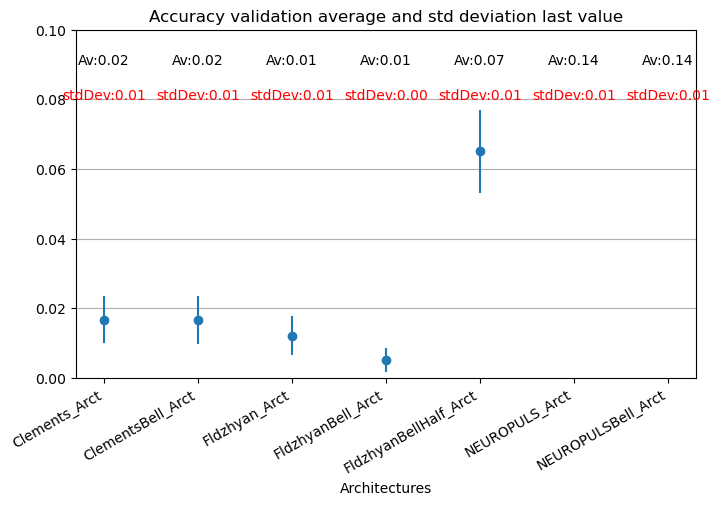

In [20]:
directory = 'outdata/20240522_run/n8_iloss0.0_imb0.3_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

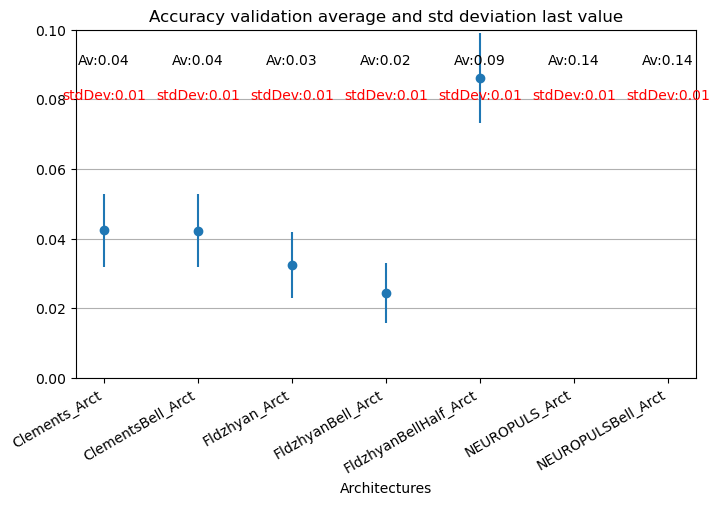

In [21]:
directory = 'outdata/20240522_run/n8_iloss0.0_imb0.4_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

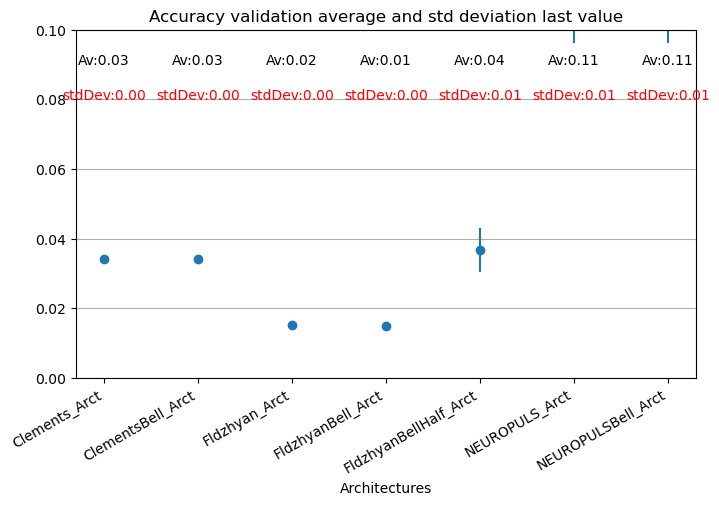

In [22]:
directory = 'outdata/20240522_run/n8_iloss0.1_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

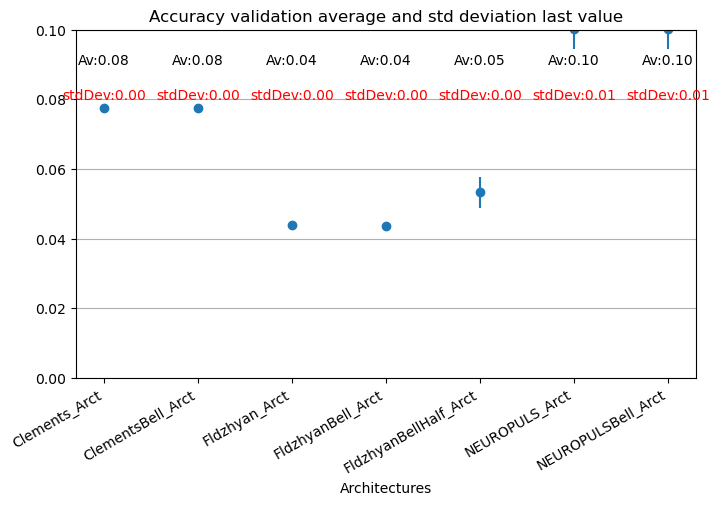

In [23]:
directory = 'outdata/20240522_run/n8_iloss0.2_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

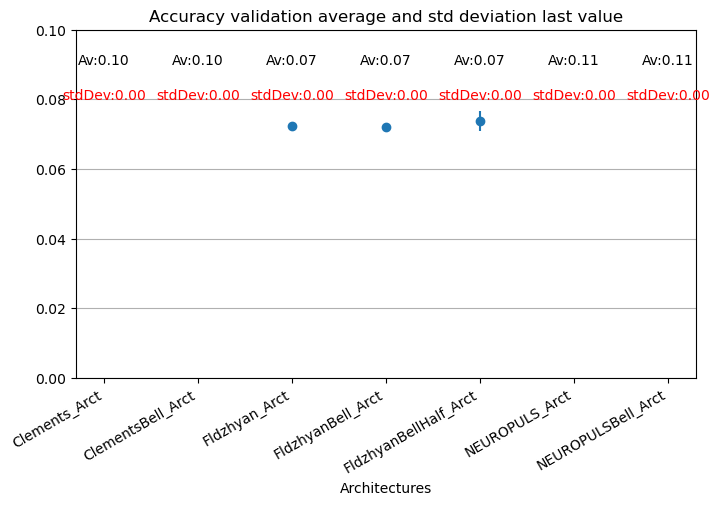

In [24]:
directory = 'outdata/20240522_run/n8_iloss0.3_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

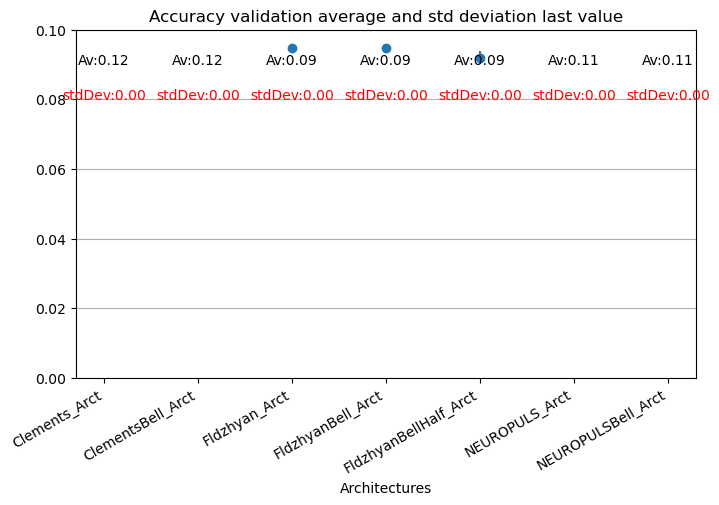

In [25]:
directory = 'outdata/20240522_run/n8_iloss0.4_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

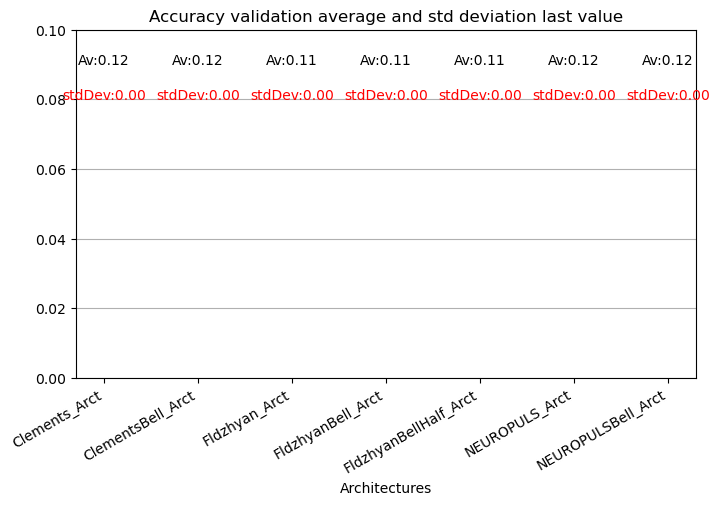

In [26]:
directory = 'outdata/20240522_run/n8_iloss0.5_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

# OLD simualtions

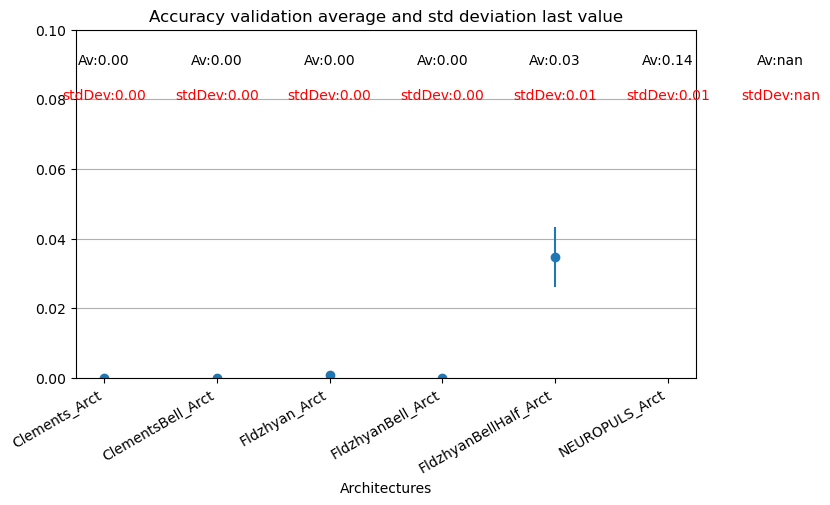

,label,average_value,std_dev_value
0,Clements_Arct,3.400631e-09,1.773671e-08
1,ClementsBell_Arct,2.940106e-08,1.850546e-07
2,Fldzhyan_Arct,6.726723e-04,4.108459e-04
3,FldzhyanBell_Arct,3.339746e-06,1.136178e-05
4,FldzhyanBellHalf_Arct,3.478473e-02,8.592718e-03
5,NEUROPULS_Arct,1.378518e-01,1.414093e-02
6,NEUROPULSBell_Arct,NaN,NaN


In [29]:
directory = 'outdata/20240512_run/outdata/20240512_n8_loss0.0_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

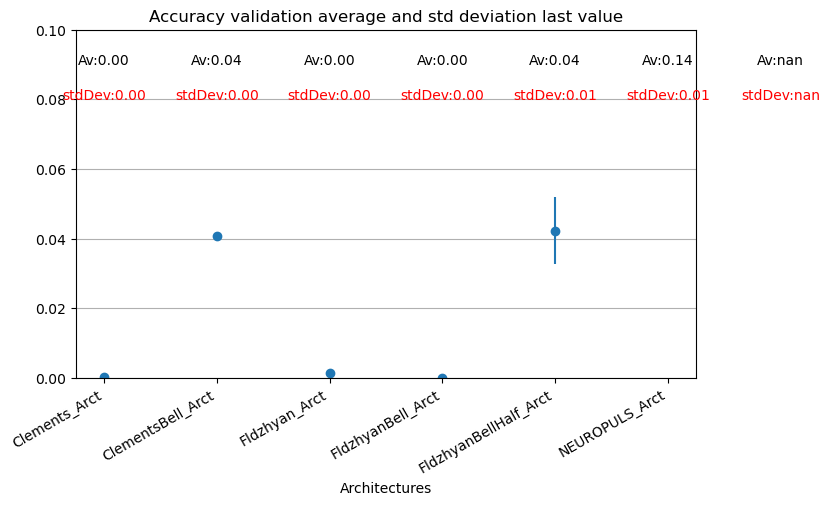

,label,average_value,std_dev_value
0,Clements_Arct,0.000210,0.000254
1,ClementsBell_Arct,0.040637,0.000112
2,Fldzhyan_Arct,0.001423,0.000907
3,FldzhyanBell_Arct,0.000041,0.000083
4,FldzhyanBellHalf_Arct,0.042247,0.009679
5,NEUROPULS_Arct,0.137852,0.014141
6,NEUROPULSBell_Arct,NaN,NaN


In [30]:
directory = 'outdata/20240512_run/outdata/20240512_n8_loss0.0_imb0.1_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
loss_pd = derive_loss(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmin_mean_devstd(loss_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df